# 市区町村の人口統計データ

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install  japanize_matplotlib 

In [107]:
import japanize_matplotlib 

In [ ]:
!wget https://raw.githubusercontent.com/UTDataMining/2020A/master/week4/SSDSE-2020A.csv

In [108]:
# 地域別統計データの読み込み
df = pd.read_csv('SSDSE-2020A.csv',  skiprows=[0,1], encoding='utf_8')
df=df[['都道府県','市区町村','総人口']]
df

,都道府県,市区町村,総人口
0,北海道,札幌市,1952356
1,北海道,函館市,265979
2,北海道,小樽市,121924
3,北海道,旭川市,339605
4,北海道,室蘭市,88564
...,...,...,...
1736,沖縄県,久米島町,7755
1737,沖縄県,八重瀬町,29066
1738,沖縄県,多良間村,1194
1739,沖縄県,竹富町,3998


In [109]:
# 総人口が0の市区町村
df[df['総人口']==0]

,都道府県,市区町村,総人口
398,福島県,富岡町,0
400,福島県,大熊町,0
401,福島県,双葉町,0
402,福島県,浪江町,0


In [110]:
# 総人口0にNoneを代入
df.loc[df['総人口']==0, '総人口']=None

In [111]:
# 欠損値を含む行を削除
df = df.dropna()
df

,都道府県,市区町村,総人口
0,北海道,札幌市,1952356.0
1,北海道,函館市,265979.0
2,北海道,小樽市,121924.0
3,北海道,旭川市,339605.0
4,北海道,室蘭市,88564.0
...,...,...,...
1736,沖縄県,久米島町,7755.0
1737,沖縄県,八重瀬町,29066.0
1738,沖縄県,多良間村,1194.0
1739,沖縄県,竹富町,3998.0


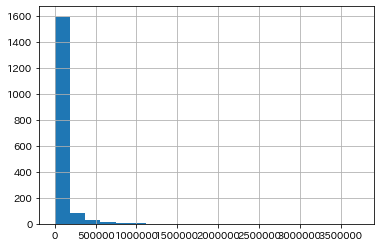

In [112]:
# ヒストグラム
df['総人口'].hist(bins=20);

In [113]:
# 並び替え
df.sort_values('総人口', ascending=False)

,都道府県,市区町村,総人口
689,神奈川県,横浜市,3724844.0
1112,大阪府,大阪市,2691185.0
984,愛知県,名古屋市,2295638.0
0,北海道,札幌市,1952356.0
1468,福岡県,福岡市,1538681.0
...,...,...,...
681,東京都,利島村,337.0
685,東京都,御蔵島村,335.0
687,東京都,青ヶ島村,178.0
405,福島県,飯舘村,41.0


In [114]:
# 記述統計
df['総人口'].describe()

count    1.737000e+03
mean     7.316911e+04
std      1.881891e+05
min      1.800000e+01
25%      8.218000e+03
50%      2.469600e+04
75%      6.355500e+04
max      3.724844e+06
Name: 総人口, dtype: float64

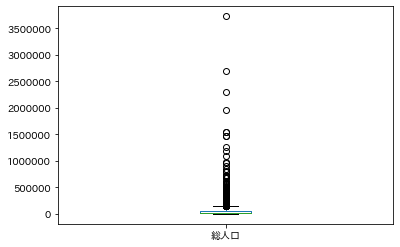

In [115]:
# 箱ヒゲ図
df['総人口'].plot.box();

In [116]:
# [平均-2*標準偏差, 平均+2*標準偏差]の範囲を抽出
mean = df['総人口'].mean()
std = df['総人口'].std() 
df = df[(df['総人口'] <= (mean+2*std)) & (df['総人口'] >= (mean-2*std))]

In [117]:
# 並び替え
df.sort_values('総人口', ascending=False)

,都道府県,市区町村,総人口
648,東京都,葛飾区,442913.0
658,東京都,町田市,432348.0
1547,長崎県,長崎市,429508.0
695,神奈川県,藤沢市,423894.0
995,愛知県,豊田市,422542.0
...,...,...,...
681,東京都,利島村,337.0
685,東京都,御蔵島村,335.0
687,東京都,青ヶ島村,178.0
405,福島県,飯舘村,41.0


In [118]:
# 記述統計
df['総人口'].describe()

count      1693.000000
mean      50820.020083
std       73130.139956
min          18.000000
25%        8046.000000
50%       23309.000000
75%       58531.000000
max      442913.000000
Name: 総人口, dtype: float64

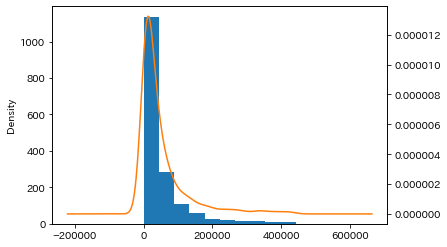

In [119]:
# ヒストグラムと分布
df['総人口'].plot(kind="hist", bins=10)
df['総人口'].plot(kind="kde", secondary_y=True);